In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import requests
from shapely.geometry import Polygon
import numpy as np
import seaborn as sns
import time
from IPython.display import Image
from numpy import unravel_index

Import previous grid and functions

In [3]:
req_dc = requests.get('https://raw.githubusercontent.com/strotgen/mexico-leaflet/master/states.geojson')
json_dc = req_dc.json()

geo_df = gpd.GeoDataFrame.from_features((json_dc))
geo_df.drop(columns=["id"])
geo_slice = geo_df.query("state_name == 'Veracruz de Ignacio de la Llave'")
geo_slice

,geometry,id,state_code,state_name
25,"POLYGON ((-97.97033 22.33294, -98.00076 22.297...",None,30,Veracruz de Ignacio de la Llave


In [4]:
v_grid = gpd.read_file("veracruz_grid.geojson")
v_grid.head(1)

,rewards,total_rewards,rewards_num,geometry
0,0.0,0.0,0.0,"POLYGON ((-95.16184 17.13680, -94.91040 17.136..."


Setting grid to be veracruz grid

In [5]:
grid = v_grid
grid["total_rewards"].unique()


array([  0.        ,  31.74946004,  73.86609071,  19.65442765,
        12.52699784,  53.13174946,  77.7537797 , 100.        ,
        12.31101512,  30.66954644,  24.62203024])

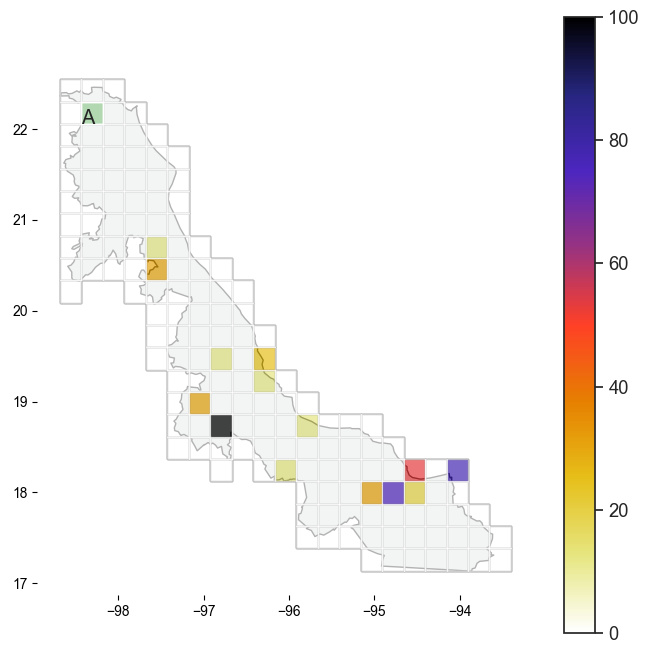

In [6]:
from shapely.geometry import Point

def plot_episode(episode,state,show=False):
    cell = grid.iloc[-state]['geometry']
    cell_geom = cell
    cell_gdf = gpd.GeoDataFrame(geometry=[cell_geom])
    cell_coords=[(pt) for pt in list(cell.exterior.coords)]

    ax = geo_slice.plot(color='#d5deda', edgecolor='black', figsize=(8,8))

    sns.set_style("white")
    sns.despine(left=True, bottom=True)
    sns.set_context("notebook", font_scale=1.2)

    grid.plot(ax=ax, color='none', edgecolor='black')
    cell_gdf.plot(ax=ax, color='green',alpha=1)
    
    data = grid[['geometry', 'total_rewards']]
    data.plot(column='total_rewards', cmap='CMRmap_r', legend=True, ax=ax, alpha=0.7)

    plt.annotate('A', xy=cell_coords[0])
    plt.savefig("episode"+str(episode)+".png")
    #if show:
        #plt.show()

plot_episode(1,6,show=False)



Define common values and common functions


In [7]:
# walls sinaloa
m = 26

out_space = []
out_space.append([[0,i]  for i in range(26) if i not in [i for i in range(5,8)]])
out_space.append([[1,i]  for i in range(26) if i not in [i for i in range(4,9)]])
out_space.append([[2,i]  for i in range(26) if i not in [i for i in range(1,10)]])
out_space.append([[3,i]  for i in range(26) if i not in [i for i in range(0,14)]])
out_space.append([[4,i]  for i in range(26) if i not in [i for i in range(0,16)]])
out_space.append([[5,i]  for i in range(26) if i not in [i for i in range(0,16)]])
out_space.append([[6,i]  for i in range(26) if i not in [i for i in range(4,15)]])
out_space.append([[7,i]  for i in range(26) if i not in [i for i in range(7,17)]])
out_space.append([[8,i]  for i in range(26) if i not in [i for i in range(8,18)]])
out_space.append([[9,i]  for i in range(26) if i not in [i for i in range(11,22)]])
out_space.append([[10,i] for i in range(26) if i not in [i for i in range(14,23)]])
out_space.append([[11,i] for i in range(26) if i not in [i for i in range(16,24)]])
out_space.append([[12,i] for i in range(26) if i not in [i for i in range(17,26)]])
out_space.append([[13,i] for i in range(26) if i not in [i for i in range(19,26)]])
out_space.append([[14,i] for i in range(26) if i not in [i for i in range(21,25)]])

In [8]:
#veracruz
m = 21
n = 22
out_space = []

out_space.append([[0,i]  for i in range(21) if i not in [i for i in range(0,3)]])
out_space.append([[1,i]  for i in range(21) if i not in [i for i in range(0,4)]])
out_space.append([[2,i]  for i in range(21) if i not in [i for i in range(0,5)]])
out_space.append([[3,i]  for i in range(21) if i not in [i for i in range(0,7)]])
out_space.append([[4,i]  for i in range(21) if i not in [i for i in range(0,7)]])
out_space.append([[5,i]  for i in range(21) if i not in [i for i in range(0,7)]])
out_space.append([[6,i]  for i in range(21) if i not in [i for i in range(0,7)]])
out_space.append([[7,i]  for i in range(21) if i not in [i for i in range(7,17)]])
out_space.append([[8,i]  for i in range(21) if i not in [i for i in range(0,8)]])
out_space.append([[9,i]  for i in range(21) if i not in [i for i in range(0,9)]])
out_space.append([[10,i] for i in range(21) if i not in [i for i in range(3,9)]])
out_space.append([[11,i] for i in range(21) if i not in [i for i in range(4,9)]])
out_space.append([[12,i] for i in range(21) if i not in [i for i in range(4,10)]])
out_space.append([[13,i] for i in range(21) if i not in [i for i in range(4,10)]])
out_space.append([[14,i] for i in range(21) if i not in [i for i in range(5,11)]])
out_space.append([[15,i] for i in range(21) if i not in [i for i in range(5,12)]])
out_space.append([[16,i] for i in range(21) if i not in [i for i in range(5,15)]])
out_space.append([[17,i] for i in range(21) if i not in [i for i in range(5,16)]])
out_space.append([[18,i] for i in range(21) if i not in [i for i in range(9,19)]])
out_space.append([[19,i] for i in range(21) if i not in [i for i in range(11,19)]])
out_space.append([[20,i] for i in range(21) if i not in [i for i in range(11,20)]])
out_space.append([[21,i] for i in range(21) if i not in [i for i in range(11,21)]])
out_space.append([[22,i] for i in range(21) if i not in [i for i in range(14,21)]])

In [9]:
def obtain_flat_st(out_space,state,space):
    flat_st = 0
    for i in range(space.shape[1]):
        for j in reversed(range(space.shape[0])):
            if [i,j] not in out_space[i]:
                flat_st+=1
            if [i,j] == state:
                return flat_st
    return None

In [25]:
def generate_rewards(out_space,m,n):
    total_r = list(grid["total_rewards"])
    rewards = np.zeros((n,m))
    k = 0
    for i in range(0,n):
        for j in range(0,m):
            if [i,j] in out_space[i]:
                rewards[i][j] = 0
            else:
                try:
                    rewards[i][j] = total_r[k]
                    k+=1
                except:
                    pass
            
    return rewards

rewards = generate_rewards(out_space,m=21, n=22)

def obtain_terminal(rewards):
    #terminal is the value with the highest rewards
    return np.unravel_index(np.argmax(rewards), rewards.shape)

def check_outspace(out_space,trial_state):
    for i in range(len(out_space)):
        if trial_state in out_space[i]:
            return True
    return False

terminal_state = obtain_terminal(rewards)


## Define movement as up down left right

In [11]:
def move(st, action, terminal_state,out_space):
    if(action == 0):  #UP
        trial_state = [st[0]-1, st[1]]
    elif(action == 1):  #DOWN
        trial_state = [st[0]+1, st[1]]
    elif(action == 2):  #LEFT
        trial_state = [st[0], st[1]-1]
    elif(action == 3):  #RIGHT
        trial_state = [st[0], st[1]+1]

    # Outer walls
    stp = trial_state
    if check_outspace(out_space,stp) or stp[0] < 0 or stp[1] < 0 or stp[0] > 21-1 or stp[1] > 21-1:
        stp = st
    
    done = False
    if stp == terminal_state:
        done = True

    return stp,done

## Soft Policies

In [12]:
gamma = 0.999;alpha = 0.4;eps =.9
actions = [0,1,2,3]
num_actions = len(actions)

def e_greedy(eps,num_actions,state,Q):
    if np.random.rand() < eps:
        action = int(np.argmax(Q[state[0],state[1]]))
    else:
        action = np.random.randint(0, num_actions)
    return action

def soft_policy(prob):
    action=np.random.choice(*[range(0,len(prob))], p=prob); #print(action)
    return action

## Simulation

In [13]:
def run_episode(n_max=10,m=21,n=22,plot_episode=False):
    # Set up intial state
    state_in = False
    while state_in == False:
        st=[np.random.randint(n),np.random.randint(m)]
        if check_outspace(out_space,st):
            state_in = True

    # Set up environment
    space = np.zeros((m,n))

    # Cumulative reward
    Rtot=0 
    
    # Maps from grip to state index
    sid=np.array(*[range(0,m*m)]).reshape(m,m)
    sid=np.flip(sid)

    # State rewards

    # Terminal state
    done=False
    terminal_states = obtain_terminal(rewards)
    
    # Average rewards per state
    Rs=np.zeros((m,n)) 

    # Transition matrix
    P=np.zeros((m*n,m*n))
    num_steps=0

    prob = [0.25,0.25,0.25, 0.25]
    
    # Run simulation
    for t in range(1,n_max+1):
        
        #obtain flat state
        flat_state = obtain_flat_st(out_space,st,space)

        # Plot episode
        if plot_episode: plot_episode(t,flat_state,show=False)

        action = soft_policy(prob)
        stp1,done = move(st,action,terminal_states,out_space)
        i = 0 
        while i<3:
            if stp1 == st:
                action = soft_policy(prob)
                stp1,done = move(st,action,terminal_states,out_space)
                i+=1
            else:
                i=3

        # Update transition matrix
        try:
            P[sid[st[0],st[1]],sid[stp1[0],stp1[1]]]+=1; num_steps+=1
        except:
            pass

        # Reward for entering state
        Rt=rewards[stp1[0],stp1[1]]
        Rtot+=Rt
                
        # Update state
        st=stp1
        
    return [P/num_steps,Rt]

P=run_episode(n_max=50)
P[0][-1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [13]:
def compute_converged_tm(m,n, n_episodes=1000):
    P = np.longdouble(np.zeros((m*n, m*n)))
    
    for i in range(n_episodes):
        ep = run_episode(n_max=12)[0]
        P += ep
    P /= n_episodes
    return P

converged_tm = compute_converged_tm(m,n, n_episodes=20)
converged_tm

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [14]:
df = pd.DataFrame(data=converged_tm.astype(float))
df.to_csv('converged.txt', sep=' ', header=False, float_format='%.4f', index=False)

## Approximating state-value function

### MC first visit

In [15]:
#set reward for current state to zero and initialize a matrix to store all rewards
Rc = 0
R = rewards

#input policy to be evaluated
def policy():
    p=[0.25,0.25,0.25, 0.25]
    action=np.random.choice(*[range(0,len(p))], p=p)
    return action

R = rewards
#initialize state_values
state_values = np.empty(n*m, dtype=object)
state_values[:] = [[] for _ in range(n*m)]

V = []
terminal_state = obtain_terminal(R)


def mc_first(V,state_values, gamma, num_episodes=100):
    #episode loop
    for i_episode in range(1, num_episodes+1):
        #generate an episode following SARSA
        episode = np.empty((n, m), dtype=object)
        episode[:] = [[[] for j in range(m)] for i in range(n)]
        for i in range(n):
            for j in range(m):
                #episode = S0A0R
                state = [i,j]
                action =policy()
                r = R[i][j]
                episode[i][j] = [state,action,r]
        flat_ep = episode.flatten()

        #define G
        G = 0
        #loop step in episode
        for i in range(n-1):
            for j in range(m):
                state = episode[i][j][0]
                r = episode[i][j][2]
                next_st = move(state, action, terminal_state,out_space)
                r_next = episode[next_st[0][0],next_st[0][1]][2]

                #G = gamma*G + R(step+1)
                G = gamma*G + r_next

                #append G to st
                state_values[i].append(G)
                
                #state_value = average(G)
                V.append(sum(state_values[i]) / len(state_values[i]))
    return V

svalues_mc_first = mc_first(V,state_values, gamma)

In [16]:
round_svmc = [round(i,2) for i in svalues_mc_first]
svalues = [round_svmc[i:i+26] for i in range(0, 676, 6)]
for row in svalues:
    print(row)
df = pd.DataFrame(data=svalues)
df.to_csv('mc_fv.txt', sep=' ', header=False, float_format='%.4f', index=False)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

## Estimating optimal policy
### Monte Carlo ES (Exploring Starts)

In [ ]:
#set reward for current state to zero and initialize a matrix to store all rewards
Rc = 0
P=np.zeros((n*m,n*m))
R = rewards
#initialize state_values
state_values = np.empty(n*m, dtype=object)
state_values[:] = [[] for _ in range(n*m)]

#input policy to be evaluated
def mc_es(P,gamma, num_episodes=100):
    #initialize Q(state_values)
    Q = np.zeros((n, m, num_actions))

    #initialize state_actions list
    state_actions = np.full((n, m, num_actions), -1)
    #episode loop
    for i_episode in range(1, num_episodes+1):

        #choose a random state_action
        x = np.random.choice(np.arange(m), size=2, replace=False)
        y = np.random.choice(np.arange(num_actions), size=1, replace=False)
        state_act = [x[0],x[1],y]
        
        #generate an episode following SARSA
        episode = np.empty((n, m), dtype=object)
        episode[:] = [[[] for j in range(m)] for i in range(n)]
        for i in range(n):
            for j in range(m):
                #episode = S0A0R
                state = [i,j]
                action =policy()
                r = R[i][j]
                episode[i][j] = [state,action,r]

        #define G
        G = 0

        #loop step in episode
        for i in range(n-1):
            for j in range(m):
                state = episode[i][j][0]
                r = episode[i][j][2]
                next_st = move(state, action, terminal_state,out_space)

                r_next = episode[next_st[0][0],next_st[0][1]][2]

                #G = gamma*G + R(step+1)
                G = gamma*G + r_next

                #if state_action not in state_actions:                
                if state_actions[state_act[0],
                                 state_act[1],
                                 state_act[2]] == -1:
                    #append G to st
                    state_actions[state_act[0],
                                 state_act[1],
                                 state_act[2]] = G

                    #Q(state_action) = G
                    Q[state_act[0],
                                 state_act[1],
                                 state_act[2]] = G

                    #policy(state) = argmax Q(state_values)
                    P[state_act[0],state_act[1]] = np.argmax(Q)
    return P


policy_mc_es = mc_es(converged_tm,gamma)

## On-policy first-visit MC

In [19]:
Rc = 0
R = rewards
P=np.zeros((n*m,n*m))

def mc_op(Pol,gamma, num_episodes=100):
    #input policy to be evaluated
    P = Pol
    #initialize Q(state_values)
    Q = np.zeros((n, m, num_actions))

    #initialize state_actions list
    state_actions = np.full((n, m, num_actions), -1)
    #episode loop
    for i_episode in range(1, num_episodes+1):

        #choose a random state_action
        x = np.random.choice(np.arange(m), size=2, replace=False)
        y = np.random.choice(np.arange(num_actions), size=1, replace=False)
        state_act = [x[0],x[1],y]
        
        #generate an episode following SARSA
        episode = np.empty((n, m), dtype=object)
        episode[:] = [[[] for j in range(m)] for i in range(n)]
        for i in range(n):
            for j in range(m):
                #episode = S0A0R
                state = [i,j]
                action =policy()
                r = R[i][j]
                episode[i][j] = [state,action,r]

        #define G
        G = 0

        #loop step in episode
        for i in range(n-1):
            for j in range(m):
                state = episode[i][j][0]
                r = episode[i][j][2]
                action = episode[i][j][1]
                next_st = move(state, action, terminal_state,out_space)
                if next_st[0][0] or next_st[0][1] == 26:
                    next_st = [state]
                r_next = episode[next_st[0][0],next_st[0][1]][2]

                #G = gamma*G + R(step+1)
                G = gamma*G + r_next

                #if state_action not in state_actions:                
                if state_actions[state_act[0],
                                 state_act[1],
                                 state_act[2]] == -1:
                    #append G to st
                    state_actions[state_act[0],
                                 state_act[1],
                                 state_act[2]] = G

                    #Q(state_action) = G
                    Q[state_act[0],
                                 state_act[1],
                                 state_act[2]] = G
                    
                    Q_max_index = np.unravel_index(np.argmax(Q), Q.shape)
                    action_sub = Q_max_index[2]

                    #for all actions in state_actions:
                    for index, value in np.ndenumerate(state_actions):
                        i, j, k = index
                        #action ==  A*:<br>
                        if state_act[2] ==  action_sub:
                            #policy(action | state) = 1-$\varepsilon$ +$\varepsilon$ /| state_actions<br>
                            P[state_act[0],state_act[1]] = 1-eps + (eps/ abs(state_actions[i][j][k]))
                        
                        #elif action !=  A*:<br>
                        elif state_act[2] !=  action_sub:
                            #policy(action | state) = $\varepsilon$ /| state_actions<br>
                            P[state_act[0],state_act[1]] = eps/ abs(state_actions[i][j][k])
    return P,Q
policy_mc_op,Q_mc_op = mc_op(P,gamma)

for i in policy_mc_op:
    print(i)

C:\Users\valer\AppData\Local\Temp\ipykernel_14616\269113369.py:72: RuntimeWarning: divide by zero encountered in divide
  P[state_act[0],state_act[1]] = 1-eps + (eps/ abs(state_actions[i][j][k]))
C:\Users\valer\AppData\Local\Temp\ipykernel_14616\269113369.py:77: RuntimeWarning: divide by zero encountered in divide
  P[state_act[0],state_act[1]] = eps/ abs(state_actions[i][j][k])


[0.  0.  0.  1.  0.  0.  0.9 0.  0.  0.9 0.  0.9 0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 

In [20]:
Q_mc_op[-1]


array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

## Off-policy MC control algorithm

In [21]:
Rc = 0
R = rewards
P=np.zeros((n*m,n*m))
Rs = np.zeros((m,m))

#b = any soft policy
#e_greedy() previously defined


def mc_off_p(gamma, num_episodes=100):
    #initialize Q(state_values)
    Q = np.zeros((n, m, num_actions))

    #initialize policy =  argmax Q(state_values)
    P = np.zeros((m, m))
    for i in range(m):
        for j in range(m):
            P[i, j] = np.max(Q[i, j, :])

    #initialize C(state_action) = 0
    C = np.zeros((m, m, num_actions))
    
    #episode loop
    for i_episode in range(1, num_episodes+1):       
        #generate an episode following SARSA using b policy
        episode = np.empty((n, m), dtype=object)
        episode[:] = [[[] for j in range(m)] for i in range(n)]
        for i in range(m):
            for j in range(m):
                #episode = S0A0R
                state = [i,j]
                action = e_greedy(eps, num_actions, state, Q)
                r = R[i][j]
                episode[i][j] = [state,action,r]

        #define G
        G = 0

        #define G
        W = 1

        #loop step in episode
        for i in range(m):
            for j in range(m):
                state = episode[i][j][0]
                action = episode[i][j][1]
                r = episode[i][j][2]
                next_st = move(state, action, terminal_state,out_space)
                if next_st[0][0] or next_st[0][1] == 26:
                    next_st = [state]
                r_next = episode[next_st[0][0],next_st[0][1]][2]

                #G = gamma*G + R(step+1)
                G = gamma*G + r_next
                
                #C(state_action) = C(state_action) + W
                C[state[0]][state[1]][action] = C[state[0]][state[1]][action] + W

                #Q(state_action) = Q(state_action) + W/C(state_action)
                # * [G-Q(state_action)]]
                sub_form_1 = Q[state[0]][state[1]][action] + (W / C[state[0]][state[1]][action])
                sub_form_2 = (G-Q[state[0]][state[1]][action])
                Q[state[0]][state[1]][action] = sub_form_1 * sub_form_2
                
                #policy(state) = argmax Q(state_values)
                P[state[0],state[1]] = np.argmax(Q)

                #if A != policy(state):
                if action != P[state[0],state[1]]:
                    break

                #else: W = W(1/b(A|state))
                else: 
                    W = W * (1/(e_greedy(eps, num_actions, state, Q)+ .000001))
    return P,Q

policy_mc_off, Q_mc_off = mc_off_p(gamma)
print(policy_mc_off)


C:\Users\valer\AppData\Local\Temp\ipykernel_14616\3654888826.py:63: RuntimeWarning: overflow encountered in scalar multiply
  Q[state[0]][state[1]][action] = sub_form_1 * sub_form_2


[[432.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.]
 [432.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.]
 [432.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.]
 [432.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.]
 [432.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.]
 [432.   0.   0. 432.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.]
 [432.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.]
 [432.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.]
 [432.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.]
 [432.   0

## Q-learning (off-policy TD control)

In [145]:
#Q-learning (off-policy TD control) for estimating the optimal policy
#initialize Q(state_values)
Q = np.zeros((n, m, num_actions))

#set reward for current state to zero and initialize a matrix to store all rewards
Rc = 0
R = rewards
P=np.zeros((n*m,n*m))
Rs = np.zeros((n, m))
space = np.zeros((m,15))


def Q_learn_offp(Q, alpha, gamma, eps, num_episodes=10):
    ep_r = {}
    #episode loop
    for i_episode in range(1, num_episodes+1):
        #initialize state
        state_in = False
        while state_in == False:
            state=[np.random.randint(15),np.random.randint(m)]
            if check_outspace(out_space,state):
                state_in = True
        
        #loop step in episode until s = terminal
        done = False
        jk = 0
        while done is False and jk<100000:
            jk +=1
            #choose A from state using egreedy derived from Q
            action = e_greedy(eps, num_actions, state, Q)
            next_s, done = move(state, action, terminal_state,out_space)
            
            i = 0 
            while i<3:
                if next_s == state:
                    action = e_greedy(eps, num_actions, state, Q)
                    next_s,done = move(state,action,terminal_state,out_space)
                    i+=1
                else:
                    i=3

            #take action A and obtain R, next_state
            reward = R[state[0], state[1]]
            #calculate Q 
            Q[state[0], state[1]][action] += alpha * (reward + gamma * Q[next_s[0], next_s[1]][action] - Q[state[0], state[1]][action])
            
            #state = next_state
            state = next_s
        ep_r[i_episode] = Rc
    return [Q,ep_r]

a = Q_learn_offp(Q, alpha, gamma, eps =.8)
q3 = a[0]
epr = a[1]

In [147]:
q3.shape

(22, 22, 4)

In [24]:
Q = q3

#set reward for current state to zero and initialize a matrix to store all rewards
Rc = 0
m = 26
R = rewards
P=np.zeros((n*m,n*m))

def sarsa_on_q(Q, alpha, gamma, eps, num_episodes=10):
    #episode loop
    for i_episode in range(1, num_episodes+1):
        #initialize state
        # Set up intial state
        state_in = False
        while state_in == False:
            state=[np.random.randint(15),np.random.randint(m)]
            if check_outspace(out_space,state):
                state_in = True
        
        #choose A from state using egreedy derived from Q
        action = e_greedy(eps, num_actions, state, Q)
            
        #loop step in episode until s = terminal
        done = False
        jk=0
        states_gif = []
        while done is False and jk <1000000:
            jk+=1
            #take action A and obtain R, next_state
            next_s, done = move(state, action, terminal_state,out_space)
            i = 0 
            while i<3:
                if next_s == state:
                    action = e_greedy(eps, num_actions, state, Q)
                    next_s,done = move(state,action,terminal_state,out_space)
                    i+=1
                else:
                    i=3
            states_gif.append(next_s)
            #flat_state = obtain_flat_st(out_space,next_s,space)
            #plot_episode(jk,flat_state,show=False)

            reward = R[state[0], state[1]]

            #choose next_action from next_state using egreedy derived from Q
            next_action = e_greedy(eps, num_actions, next_s, Q)

            #calculate Q
            Q[state[0], state[1]][action] += alpha * (reward + gamma * Q[next_s[0], next_s[1]][next_action] - Q[state[0], state[1]][action])
            
            #state = next_state
            state, action = next_s, next_action
        return Q,states_gif

Q_sarsa_on,states_gif = sarsa_on_q(Q, alpha, gamma, eps=.8888)
df = pd.DataFrame(data=states_gif)
df.to_csv('sarsa_actions3.txt', sep=' ', header=False, float_format='%.4f', index=False)

## Comparison with traditional ML

In [15]:
grid['label'] = pd.cut(grid['rewards'], bins=[-float('inf'), 30, float('inf')], labels=[0, 1])

## KNN

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(grid[['total_rewards']], grid['label'], test_size=0.3, random_state=42)

results_knn = {}
for i in range(10,110,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results_knn[i] = (accuracy*100)
results_knn

{10: 93.61702127659575,
 20: 89.36170212765957,
 30: 89.36170212765957,
 40: 89.36170212765957,
 50: 89.36170212765957,
 60: 89.36170212765957,
 70: 89.36170212765957,
 80: 89.36170212765957,
 90: 89.36170212765957,
 100: 89.36170212765957}

## FFNN

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

# Define a custom dataset class to load the data
class CustomDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.Tensor(X)
        self.y = torch.Tensor(y).long()

    def __len__(self):
        return len(self.X)

    def __getitem__(self, index):
        return self.X[index], self.y[index]


# Create PyTorch datasets and data loaders
X_train = X_train.values.astype(np.float32)
X_test = X_test.values.astype(np.float32)
y_train = y_train.values.astype(np.float32)
y_test = y_test.values.astype(np.float32)

train_dataset = CustomDataset(X_train, y_train)
test_dataset = CustomDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16)

# Define a simple neural network
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1, 16)
        self.fc2 = nn.Linear(16, 2)

    def forward(self, x):
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Create an instance of the neural network
net = Net()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Train the neural network
for epoch in range(10):
    for i, (inputs, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

# Test the neural network
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = net(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Print the accuracy
accuracy = 100 * correct / total
print('Accuracy: %.2f%%' % accuracy)


Accuracy: 95.74%


In [107]:
m=22

## Function approximation

In [21]:
np_grid = grid[['total_rewards']]
np_grid = np_grid.values.astype(np.float32)
np_grid[0]

array([0.], dtype=float32)

In [18]:
def prediction(net, data_point):
    with torch.no_grad():
        input_tensor = torch.Tensor(data_point).unsqueeze(0)
        output_tensor = net(input_tensor)
        _, predicted_class = torch.max(output_tensor.data, 1)
        return predicted_class.item()

prediction(net,X_train[11])

1

In [19]:
matrix = [[0 for j in range(30)] for i in range(30)]
start_i, start_j = 15, 15
movement_range = range(-2, 3)
movement_dict = {}
k=0
for i in movement_range:
    for j in movement_range:
        if start_i+i >= 0 and start_i+i < 30 and start_j+j >= 0 and start_j+j < 30:
            movement_dict[k] = (i,j)
            k+=1

In [22]:
import random
def deep_policiy(st,np_grid):
    """
    Generates a dictionary with action id,
    state where the action would occur given the current state,
    and flat state
    returns the state, action and flat state selected by the FFNN
    """
    #generate spaces for the FFNN to choose from
    search_space = {}
    flat_state = obtain_flat_st(out_space,[10,10],np.zeros((n,m)))
    geo_search_spaces = [i for i in range(flat_state-13,flat_state+12)]
    
    for key in movement_dict.keys():
        search_space[key] = [[st[0]+movement_dict[key][0],st[1]+movement_dict[key][1]],geo_search_spaces[key]]

    trial_states = [prediction(net,np_grid[i]) for i in geo_search_spaces]
    ones = [i for i in range(len(trial_states)) if trial_states[i] == 1]

    if not ones:
        trial_st = random.randint(0, len(trial_states)-1)
    else:
        trial_st = random.choice(ones)

    for key in search_space.keys():
        if search_space[key][1] == geo_search_spaces[trial_st]:
            return key,search_space[key][0],search_space[key][1]

action,trial_st,flat_st =deep_policiy([10,10],np_grid)

In [23]:
def deep_move(st, trial_state, terminal_state,out_space):
    # Outer walls
    stp = trial_state
    if check_outspace(out_space,stp) or stp[0] < 0 or stp[1] < 0 or stp[0] > 21-1 or stp[1] > 21-1:
        stp = st
    
    done = False
    if stp == terminal_state:
        done = True
    return stp,done

### Sarsa on policy for estimating action values with function approximation

In [30]:
num_actions = 25
Q = np.zeros((n, m, num_actions)) 

#set reward for current state to zero and initialize a matrix to store all rewards
Rc = 0
R = rewards
P=np.zeros((n*m,n*m))
states_gif = []

def sarsa_on_q(Q, alpha, gamma, eps, num_episodes=10):
    #episode loop
    for i_episode in range(1, num_episodes+1):
        #initialize state
        # Set up intial state
        state_in = False
        while state_in == False:
            state=[np.random.randint(15),np.random.randint(m)]
            if check_outspace(out_space,state):
                state_in = True
        
        #choose A from state using egreedy derived from Q
        action,trial_st,flat_st =deep_policiy(state,np_grid)
            
        #loop step in episode until s = terminal
        done = False
        jk=0
        while done is False and jk <1000000:
            jk+=1
            #take action A and obtain R, next_state
            next_s, done = deep_move(st = state, trial_state = trial_st, terminal_state = terminal_state,out_space =out_space)
            i = 0 
            while i<3:
                if next_s == state:
                    action,trial_st,flat_st =deep_policiy(state,np_grid)
                    next_s, done = deep_move(st = state, trial_state = trial_st, terminal_state = terminal_state,out_space =out_space)
                    i+=1
                else:
                    i=3
            states_gif.append(next_s)

            reward = R[state[0], state[1]]

            #choose next_action from next_state using egreedy derived from Q
            next_action = e_greedy(eps, num_actions, next_s, Q)

            #calculate Q
            
            Q[state[0], state[1]][action] += alpha * (reward + gamma * Q[next_s[0], next_s[1]][next_action] - Q[state[0], state[1]][action])
            
            #state = next_state
            state, action = next_s, next_action
        return Q,states_gif

Q_sarsa_on,states_gif = sarsa_on_q(Q, alpha, gamma, eps=.8888)
states_gif

In [163]:
df = pd.DataFrame(data=states_gif)
df.to_csv('sarsa_actions_fa2.txt', sep=' ', header=False, float_format='%.4f', index=False)

Plotting episodes to generate gif

In [28]:
b = 0
for i in range(len(states_gif)):
    if b != states_gif[i]:
        try:
            flat_state = obtain_flat_st(out_space,states_gif[i],space)
            plot_episode(i,flat_state)
        except:
            pass
    b = states_gif[i]